### IMPORT REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### READ AND MERGE TWELVE MONTH SALES DATA

In [2]:
path = "C:/Users/shubh/Desktop/Project/Python_Project/Python_Sales_Analysis/Sales_Data/"

file_lst = os.listdir(path)

df = pd.DataFrame()

for file in file_lst:
    if file.endswith(".csv"):
        df = pd.concat([df,pd.read_csv(path+file)])
    else:
        continue

In [3]:
df.shape

(186850, 6)

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### DATA CLEANING

#### Check Duplicates

In [5]:
df.duplicated().sum()

1162

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

#### Check Null Values

In [8]:
df.isnull().sum()

Order ID            1
Product             1
Quantity Ordered    1
Price Each          1
Order Date          1
Purchase Address    1
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### Check Datatype

In [11]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [13]:
df['Quantity Ordered'].unique()

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

In [14]:
df[df['Quantity Ordered'] == "Quantity Ordered"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [15]:
df.drop(index=519,axis=0,inplace=True)

In [16]:
df = df.astype({
    'Order ID': 'int',
    'Quantity Ordered': 'int',
    'Price Each': 'float'
})

In [17]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [18]:
df.dtypes

Order ID                     int32
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [19]:
df.reset_index(drop=True,inplace=True)

In [20]:
df.shape

(185675, 6)

In [21]:
df['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

### FEATURE ENGINEERING

Note - The dataframe contains sales data for year 2019 only.


#### Add Month Column

In [24]:
df['Month'] = df['Order Date'].dt.month_name()
df['Month-Num'] = df['Order Date'].dt.month

#### Add Year Quarter Column

In [25]:
df['YrQuarter'] = df['Order Date'].dt.quarter

#### Add Day_name Column

In [26]:
df['Day Name'] = df['Order Date'].dt.strftime("%A")

#### Add Total Sale Column

In [27]:
df['Sales'] = df['Price Each']*df['Quantity Ordered']

#### Add City Column

In [28]:
def get_city(x):
    return x.split(",")[1].strip()

def get_state(x):
    return x.split(",")[2].split(" ")[1].strip()

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

#### Add Order Hour Column

In [29]:
df['Order Hour'] = df['Order Date'].dt.hour

#### Final DataFrame

In [30]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,YrQuarter,Month-Num,Day Name,Sales,City,Order Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,2,4,Friday,23.90,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,2,4,Sunday,99.99,Boston (MA),22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,2,4,Friday,600.00,Los Angeles (CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,2,4,Friday,11.99,Los Angeles (CA),14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,2,4,Tuesday,11.99,Los Angeles (CA),9


### EDA

### Best Month for Sales and Quantity Sold?

#### Month wise Total Sales and %age Sales

In [31]:
df_month_sales = df.groupby("Month").agg({
    'Sales': 'sum'
}).sort_values('Sales', ascending=False)
df_month_sales['Sales%'] = df_month_sales['Sales'].apply(
    lambda x: round(x / (df_month_sales.sum()) * 100, 2))
df_month_sales

,Sales,Sales%
Month,,
December,4608280.75,13.37
October,3734177.86,10.83
April,3389217.98,9.83
November,3197863.10,9.28
May,3150506.24,9.14
March,2804969.51,8.14
July,2646311.32,7.68
June,2576268.16,7.48
August,2241071.38,6.50


#### Top Five Month Based on Total Sales

In [32]:
df_month_sales[:5]

,Sales,Sales%
Month,,
December,4608280.75,13.37
October,3734177.86,10.83
April,3389217.98,9.83
November,3197863.10,9.28
May,3150506.24,9.14


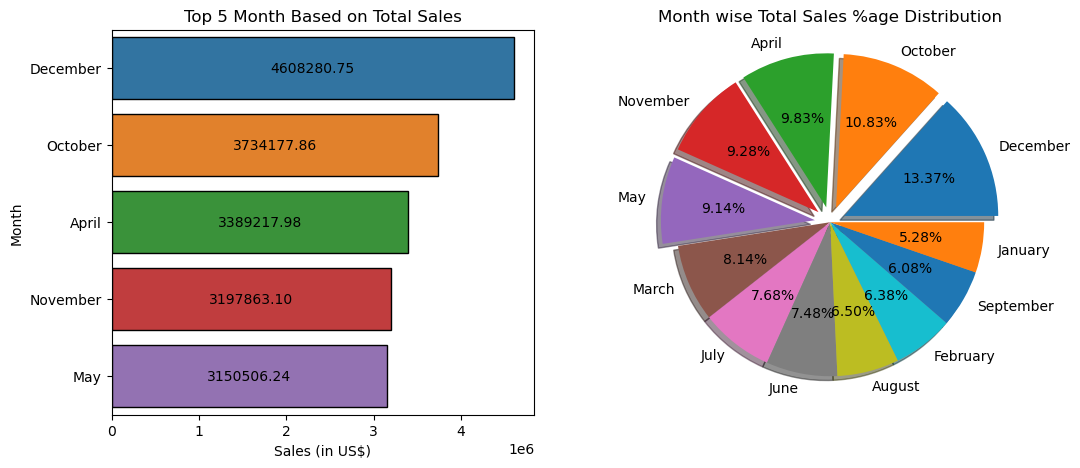

In [33]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
ax = sns.barplot(df_month_sales[:5],
                 y=df_month_sales.index[:5],
                 x='Sales',
                 edgecolor='black',
                 estimator='sum')
plt.bar_label(ax.containers[0], label_type='center', fmt='%.2f')
plt.xlabel("Sales (in US$)")
plt.title("Top 5 Month Based on Total Sales")

plt.subplot(1, 2, 2)
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0]
plt.pie(labels=df_month_sales.index,
        x=df_month_sales.iloc[:, 0],
        explode=explode,
        shadow=True,
        autopct='%.2f%%')
plt.title("Month wise Total Sales %age Distribution")
plt.show()

#### Month wise Quantity Sold and %age Quantity Sold

In [34]:
df_month_qty = df.groupby("Month").agg({
    'Quantity Ordered': 'sum'
}).sort_values('Quantity Ordered', ascending=False)
df_month_qty['Quantity Ordered (in %)'] = df_month_qty[
    'Quantity Ordered'].apply(lambda x: round(x /
                                              (df_month_qty.sum()) * 100, 2))
df_month_qty

,Quantity Ordered,Quantity Ordered (in %)
Month,,
December,28073,13.44
October,22668,10.86
April,20536,9.84
November,19768,9.47
May,18652,8.93
March,16978,8.13
July,16053,7.69
June,15233,7.30
February,13430,6.43


#### Top Five Months Based on Quantity Sold

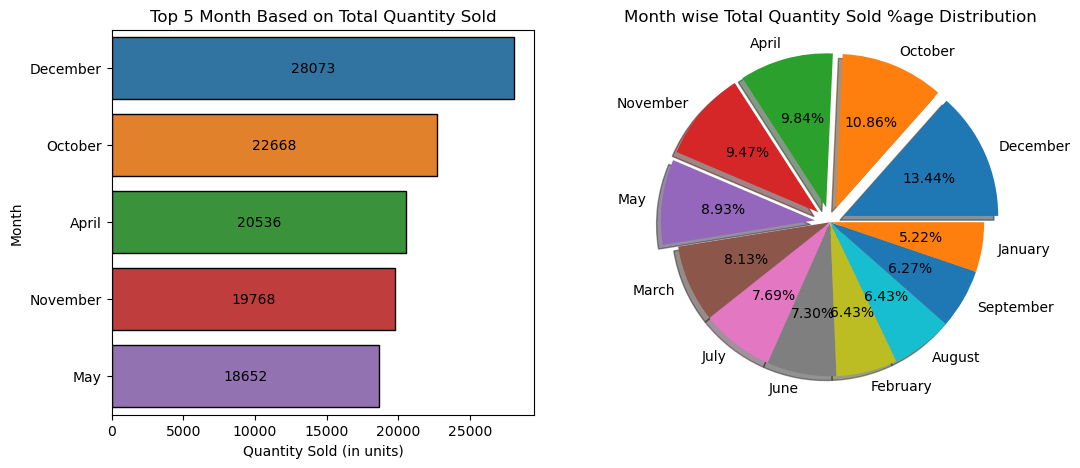

In [35]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
ax = sns.barplot(df_month_qty[:5],
                 y=df_month_qty.index[:5],
                 x='Quantity Ordered',
                 edgecolor='black',
                 estimator='sum')
plt.bar_label(ax.containers[0], label_type='center', fmt='%.0f')
plt.xlabel("Quantity Sold (in units)")
plt.title("Top 5 Month Based on Total Quantity Sold")

plt.subplot(1, 2, 2)
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0]
plt.pie(labels=df_month_qty.index,
        x=df_month_qty.iloc[:, 0],
        explode=explode,
        shadow=True,
        autopct='%.2f%%')
plt.title("Month wise Total Quantity Sold %age Distribution")
plt.show()

<b>Observation :</b> 
December month is at the top in terms of both total sales and quantity sold. Almost 13.44% sales done on december month.<br>
Also, October, April and November being the 2nd , 3rd and 4th month in terms of both total sales and quantity sold.

<b>Inference :</b>
December month sales might be higher due to Christmas and new year.<br>
Also, it is concluded from data that quarter-4 has highest sales.

### City Sold the Most Product?

#### City wise Total Sales, Quantity Sold, %age Quantity Sold  and %age Sales

In [36]:
df_city_qty = df.groupby('City').agg({
    'Quantity Ordered': 'sum',
    'Sales': 'sum'
}).sort_values('Quantity Ordered', ascending=False)
df_city_qty['Quantity Ordered (in %)'] = df_city_qty['Quantity Ordered'].apply(
    lambda x: round(x / (df['Quantity Ordered'].sum()) * 100, 2))
df_city_qty['Sales (in %)'] = df_city_qty['Sales'].apply(
    lambda x: round(x / (df['Sales'].sum()) * 100, 2))
df_city_qty

,Quantity Ordered,Sales,Quantity Ordered (in %),Sales (in %)
City,,,,
San Francisco (CA),50166,8254609.62,24.03,23.95
Los Angeles (CA),33245,5448280.34,15.92,15.81
New York City (NY),27901,4661714.15,13.36,13.53
Boston (MA),22492,3657927.66,10.77,10.61
Dallas (TX),16707,2765373.96,8.00,8.02
Atlanta (GA),16583,2794195.23,7.94,8.11
Seattle (WA),16534,2745046.02,7.92,7.96
Portland (OR),11291,1870010.56,5.41,5.43
Austin (TX),11136,1818029.38,5.33,5.28


#### Top Five Cities Based on Quantity Sold

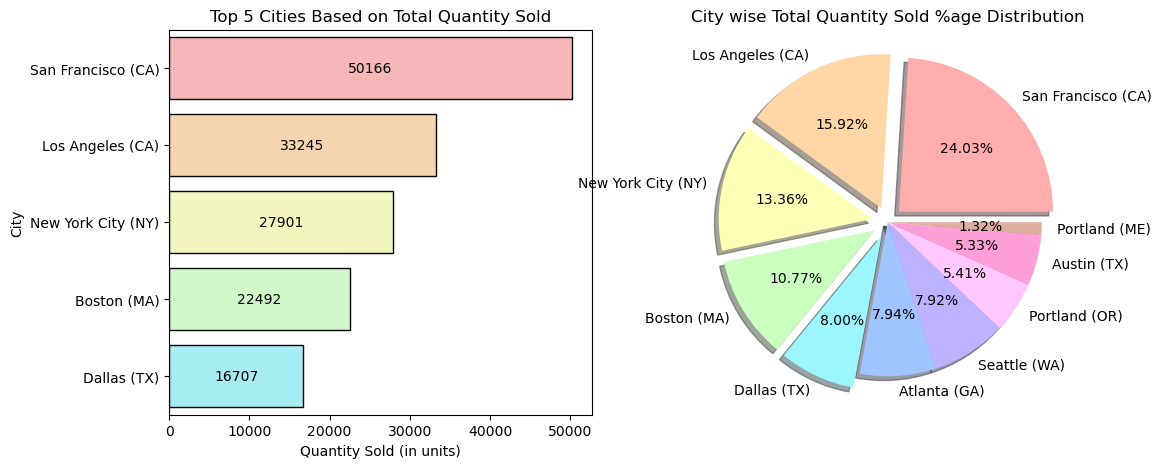

In [37]:
color = ['#FFADAD','#ffd6a5','#fdffb6','#caffbf','#9bf6ff',
         '#a0c4ff','#bdb2ff','#ffc6ff','#ff9ed7','#deae9f']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
ax = sns.barplot(df_city_qty[:5],
                 y=df_city_qty.index[:5],
                 x='Quantity Ordered',
                 edgecolor='black',
                 estimator='sum',palette=color)
plt.bar_label(ax.containers[0], label_type='center', fmt='%.0f')
plt.xlabel("Quantity Sold (in units)")
plt.title("Top 5 Cities Based on Total Quantity Sold")

plt.subplot(1, 2, 2)
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0, 0, 0, 0,0]
plt.pie(labels=df_city_qty.index,
        x=df_city_qty.iloc[:, 0],
        explode=explode,
        shadow=True,
        autopct='%.2f%%',colors=color)
plt.title("City wise Total Quantity Sold %age Distribution")
plt.show()

<b>Observation :</b> 
San Francisco is at the top in terms of both total sales and quantity sold. Almost 24.03% sales came from san francisco city.<br>
Also, Los Angeles, New York and Boston being the 2nd , 3rd and 4th city in terms of both total sales and quantity sold.

<b>Inference :</b>
These cities will might be the profitable one. Also to increase the likelihood of customer's buying we may increase the advertisement or provide offers in these cities.

### Best Time to Display Advertisements to Maximize the Likelihood of Customer’s Buying Product?

#### Order Hour wise Order Count

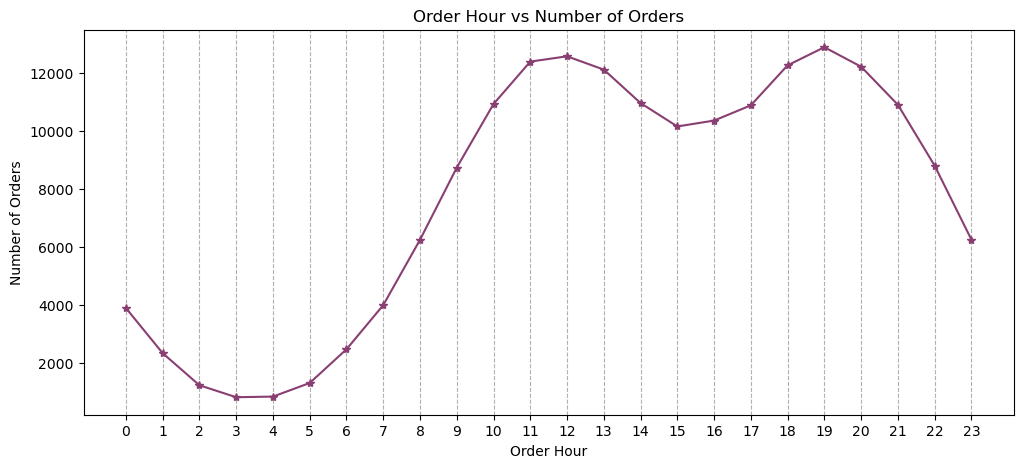

In [41]:
df_hour = df.groupby('Order Hour').agg({'Order ID':'count'})
plt.figure(figsize=(12,5))
plt.plot(df_hour,marker='*',color='#893f71')
plt.xticks(df_hour.index)
plt.xlabel("Order Hour")
plt.ylabel("Number of Orders")
plt.grid(axis='x',ls='--')
plt.title("Order Hour vs Number of Orders")
plt.show()

#### Order Hour and City wise Order Count

In [39]:
df_city_orderhr = pd.pivot_table(data=df,
                                 index='Order Hour',
                                 columns='City',
                                 values='Order ID',
                                 aggfunc='count')

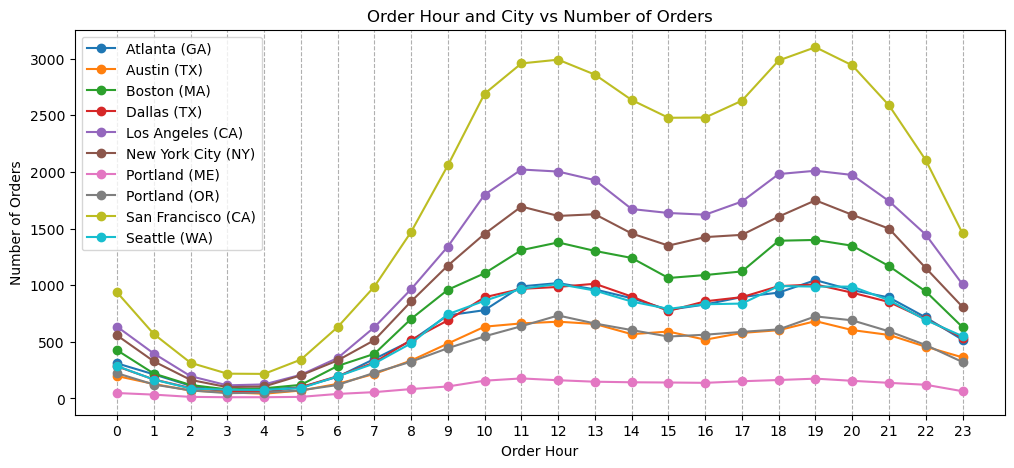

In [42]:
plt.figure(figsize=(12,5))
plt.plot(df_city_orderhr,marker='o',label=df_city_orderhr.columns)
plt.xticks(df_city_orderhr.index)
plt.grid(axis='x',ls='--')
plt.xlabel("Order Hour")
plt.ylabel("Number of Orders")
plt.title("Order Hour and City vs Number of Orders")
plt.legend()
plt.show()

#### Week Day wise Order Count

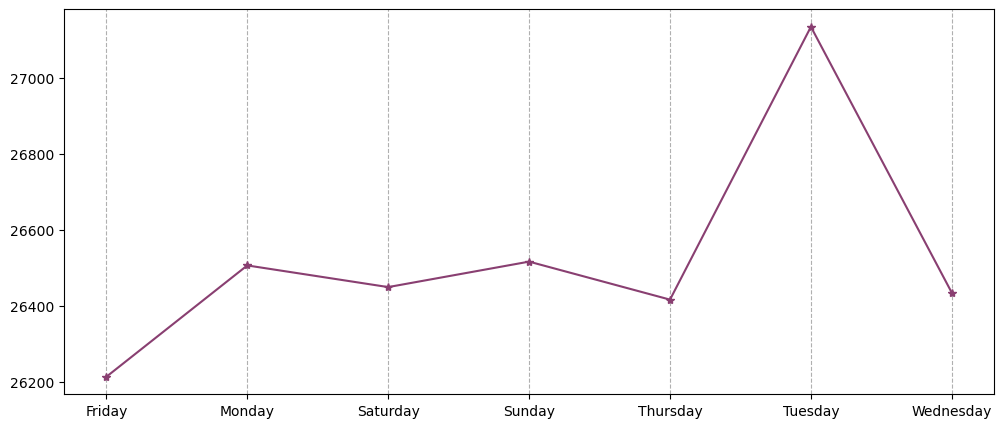

In [43]:
df_dayname = df.groupby('Day Name').agg({'Order ID':'count'})
plt.figure(figsize=(12,5))
plt.plot(df_dayname,marker='*',color='#893f71')
plt.xticks(df_dayname.index)
plt.grid(axis='x',ls='--')
plt.show()

<b>Observation :</b> 
In all the cities, most of the customers place order between 10:00 A.M to 1:00 P.M and 6:00 P.M to 8:00 P.M.<br>
Also, on tuesday the number of customers is more in comparision to other weekdays.

<b>Inference :</b>
These duration will be the best for advertisement.

### Product Sold the Most? 

#### Product wise Total Quantity Sold, It's Price and %age Quantity Sold

In [44]:
df_product_qty = df.groupby('Product').agg({
    'Quantity Ordered': 'sum',
    'Price Each': 'mean'
}).sort_values('Quantity Ordered', ascending=False)
df_product_qty['Quantity Ordered (in %)'] = df_product_qty[
    'Quantity Ordered'].apply(
        lambda x: round(x / (df['Quantity Ordered'].sum()) * 100, 2))
df_product_qty

,Quantity Ordered,Price Each,Quantity Ordered (in %)
Product,,,
AAA Batteries (4-pack),30985,2.99,14.84
AA Batteries (4-pack),27614,3.84,13.23
USB-C Charging Cable,23929,11.95,11.46
Lightning Charging Cable,23168,14.95,11.10
Wired Headphones,20522,11.99,9.83
Apple Airpods Headphones,15636,150.00,7.49
Bose SoundSport Headphones,13429,99.99,6.43
27in FHD Monitor,7541,149.99,3.61
iPhone,6847,700.00,3.28


#### Top Five most Sold Product

In [45]:
df_product_qty[:5]

,Quantity Ordered,Price Each,Quantity Ordered (in %)
Product,,,
AAA Batteries (4-pack),30985,2.99,14.84
AA Batteries (4-pack),27614,3.84,13.23
USB-C Charging Cable,23929,11.95,11.46
Lightning Charging Cable,23168,14.95,11.10
Wired Headphones,20522,11.99,9.83


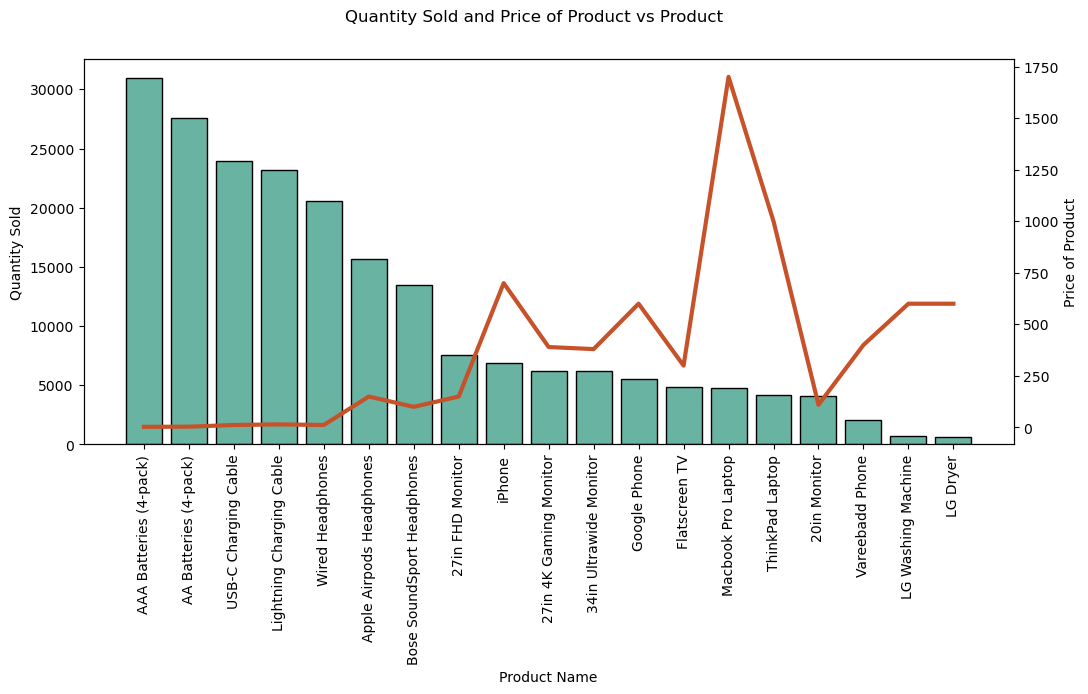

In [46]:
color_bar = "#69b3a2"
color_line = "#c7522a"

fig, ax1 = plt.subplots(figsize=(12, 5))
ax2 = ax1.twinx()

ax1.bar(x = df_product_qty.index, 
        height = df_product_qty['Quantity Ordered'], 
        color=color_bar, 
        edgecolor="black")
ax2.plot(df_product_qty['Price Each'],
         color=color_line,
         lw=3)

ax1.set_xlabel("Product Name")
ax1.set_ylabel("Quantity Sold")

ax2.set_ylabel("Price of Product")

ax1.tick_params(axis='x',labelrotation=90)

fig.suptitle("Quantity Sold and Price of Product vs Product")
plt.show()

<b>Observation :</b> 
AAA and AA Batteries, USB-C Charging Cable, Lightning Cable, Wired Headphones and Apple Airpods are among the top 5 best selling Product.

<b>Inference :</b>
From the plot shown above, we conclude that the reason for being the top selling product is because of its lowest price among all the products available.

### Products Most Often Sold Together?

In [47]:
df_dup_orderid = df[df.duplicated(subset=['Order ID'],keep=False)]
df_dup_orderid.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,YrQuarter,Month-Num,Day Name,Sales,City,Order Hour
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,2,4,Friday,600.00,Los Angeles (CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,2,4,Friday,11.99,Los Angeles (CA),14


In [48]:
df_grp_orderid = df_dup_orderid.groupby('Order ID',as_index=False).agg({'Product':",".join})
df_grp_orderid.head()

,Order ID,Product
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"


In [49]:
from itertools import combinations
from collections import Counter

#### Top 10 Products Pairs that are Sold Together (Pair of 2)

In [50]:
count = Counter()

for row in df_grp_orderid['Product']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Top 5 Products Pairs that are Sold Together (Pair of 3)

In [51]:
count = Counter()

for row in df_grp_orderid['Product']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))

for key,value in count.most_common(5):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 86
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33


<b>Inference :</b>
The above shown product pair will be helpful to give offers and discounts to the customers.

### Month on Month Sales Growth %?

In [52]:
df_grp_month = df.groupby('Month-Num',as_index=False).agg({'Sales':'sum'})
df_grp_month["Prev_Month_Sales"] = df_grp_month['Sales'].shift(1)
df_grp_month["MOM Growth%"] = round(((df_grp_month['Sales']/df_grp_month['Prev_Month_Sales'])-1)*100,2)
df_grp_month.fillna(0,inplace=True)
df_grp_month

,Month-Num,Sales,Prev_Month_Sales,MOM Growth%
0,1,1821313.17,0.00,0.00
1,2,2200075.09,1821313.17,20.80
2,3,2804969.51,2200075.09,27.49
3,4,3389217.98,2804969.51,20.83
4,5,3150506.24,3389217.98,-7.04
5,6,2576268.16,3150506.24,-18.23
6,7,2646311.32,2576268.16,2.72
7,8,2241071.38,2646311.32,-15.31
8,9,2094453.74,2241071.38,-6.54
9,10,3734177.86,2094453.74,78.29


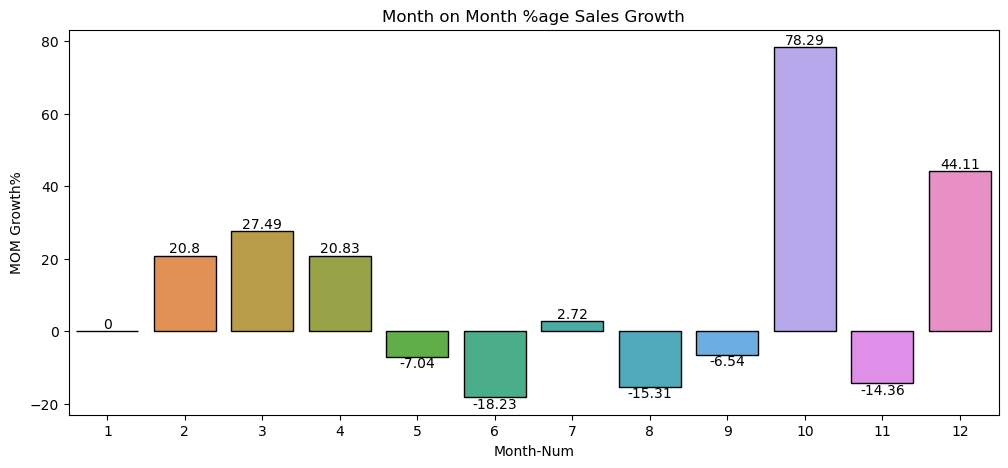

In [53]:
plt.figure(figsize=(12,5))
ax = sns.barplot(data=df_grp_month,
                 x='Month-Num',
                 y='MOM Growth%',
                 edgecolor='black')
plt.bar_label(ax.containers[0])
plt.title("Month on Month %age Sales Growth")
plt.show()